

# Project: Investigate a Dataset (TMDB movies !)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> we are going to do some games with our dataset(TMDB Movies) to know the properties of our dataset for answering some questions such as  ''What kinds of properties are associated with movies that have high revenues''.

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, We will load in the data, check for cleanliness, and then trim and clean our dataset for analysis.

### General Properties
Dataset chosen for analysis: TMDB movies
>This data set contains information more than 10,000 movies collected from The Movie Database (TMDb),including user ratings and revenue.I'll ask questions related to genres and popularity.

Questions to answer:
>1- Which genres are most popular from year to year?

>2- What kinds of properties are associated with movies that have high revenues?

In [87]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df=pd.read_csv('tmdb-movies.csv')
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [88]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [90]:
df.shape

(10866, 21)

<a id='eda'></a>

Data Cleaning (drop unneeded columns, fix structure)
>TMDb Movie Data is the choosen dataset
The database contains information about movies collected from The Movies Database, including revenue, budget.

The Data Structure
>Before working with the data I checked the database and found missing values, inconsistency or inadequate datatype. After getting more information and find out the questions I wanted to pose, I cleaned the database. There were unecessary columns with missing data, inadequate datatypes. The columns 'genres' and 'production_companies' contained multiple values that doesn't meet the requirements of the normal form.

The Cleaning Process
>I removed the columns cast, homepage, tagline, keywords, overview and imdb id to improve database redability.
The column 'genres' and 'productions_companies' were not in the first normal form which requires that in the table should not have multiple value in the same row of data. I was unable to create a second joined column, so I decided to remove the values after the first '|' sign to get better grouping and cleaner visualization in the further analysis.
I casted release_date from string to date datatype.
I converted the columns revenue, budget from float to int.
I dropped the Null value raws

In [91]:
'''we can drop some columns to make it more readable'''
df=df.drop(['id','cast', 'homepage', 'tagline', 'keywords', 'overview', 'imdb_id'], axis=1)
df.head(1)

,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [92]:
'''drop rows with missing values'''
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9807 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            9807 non-null   float64
 1   budget                9807 non-null   int64  
 2   revenue               9807 non-null   int64  
 3   original_title        9807 non-null   object 
 4   director              9807 non-null   object 
 5   runtime               9807 non-null   int64  
 6   genres                9807 non-null   object 
 7   production_companies  9807 non-null   object 
 8   release_date          9807 non-null   object 
 9   vote_count            9807 non-null   int64  
 10  vote_average          9807 non-null   float64
 11  release_year          9807 non-null   int64  
 12  budget_adj            9807 non-null   float64
 13  revenue_adj           9807 non-null   float64
dtypes: float64(4), int64(5), object(5)
memory usage: 1.1+ MB


after this cleaning we are going to visualize our new data

c:\users\ashra\appdata\local\programs\python\python39\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'budget'}>,
        <AxesSubplot:title={'center':'revenue'}>],
       [<AxesSubplot:title={'center':'runtime'}>,
        <AxesSubplot:title={'center':'vote_count'}>,
        <AxesSubplot:title={'center':'vote_average'}>],
       [<AxesSubplot:title={'center':'release_year'}>,
        <AxesSubplot:title={'center':'budget_adj'}>,
        <AxesSubplot:title={'center':'revenue_adj'}>]], dtype=object)

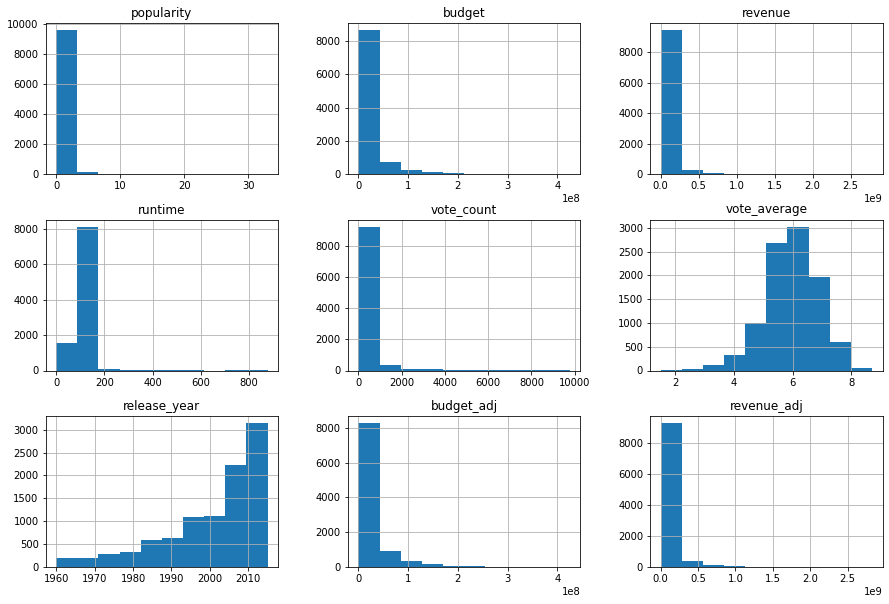

In [93]:
df.hist(figsize=(15,10))

In [94]:
#dropping the null values

df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9807 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            9807 non-null   float64
 1   budget                9807 non-null   int64  
 2   revenue               9807 non-null   int64  
 3   original_title        9807 non-null   object 
 4   director              9807 non-null   object 
 5   runtime               9807 non-null   int64  
 6   genres                9807 non-null   object 
 7   production_companies  9807 non-null   object 
 8   release_date          9807 non-null   object 
 9   vote_count            9807 non-null   int64  
 10  vote_average          9807 non-null   float64
 11  release_year          9807 non-null   int64  
 12  budget_adj            9807 non-null   float64
 13  revenue_adj           9807 non-null   float64
dtypes: float64(4), int64(5), object(5)
memory usage: 1.1+ MB


In [95]:
# Convert release_date (object datatype) to date.

df['release_date'] = pd.to_datetime(df['release_date'])

In [96]:
#replace 0 values with means in columns budget.

df['budget'] = df['budget'].replace(0,df['budget'].mean())


#replace 0 values with means in columns revenue.

df['revenue'] = df['revenue'].replace(0,df['revenue'].mean())

In [97]:
#delete extra data from the rows with multiple values.

df['genres'] = df['genres'].apply(lambda x: x.split('|')[0])

df['production_companies'] = df['production_companies'].apply(lambda x: x.split('|')[0])

In [98]:
df.head(3)

,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,124,Action,Universal Studios,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,George Miller,120,Action,Village Roadshow Pictures,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000.0,2.952382e+08,Insurgent,Robert Schwentke,119,Adventure,Summit Entertainment,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08


<a id='eda'></a>
## Exploratory Data Analysis

>  Now that we've trimmed and cleaned our data, we're ready to move on to exploration.
### Research Question 1 (What kinds of properties are associated with high revenues?)

In [99]:
# Sort movies by revenue in descending order.

sorted_revenue_biggest = df.sort_values(by=['revenue'], ascending = False).head(200)
sorted_revenue_biggest.head(1)


,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1386,9.432768,237000000.0,2.781506e+09,Avatar,James Cameron,162,Action,Ingenious Film Partners,2009-12-10,8458,7.1,2009,2.408869e+08,2.827124e+09


<AxesSubplot:>

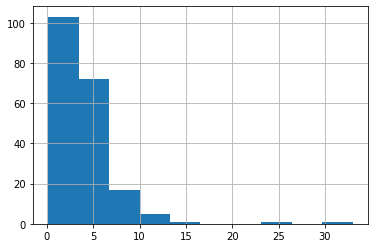

In [100]:
sorted_revenue_biggest.popularity.hist()

<AxesSubplot:>

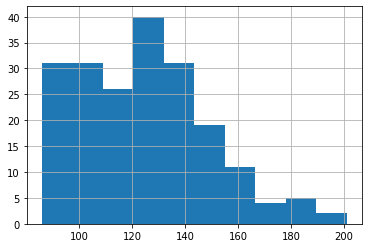

In [101]:
sorted_revenue_biggest.runtime.hist()

<AxesSubplot:>

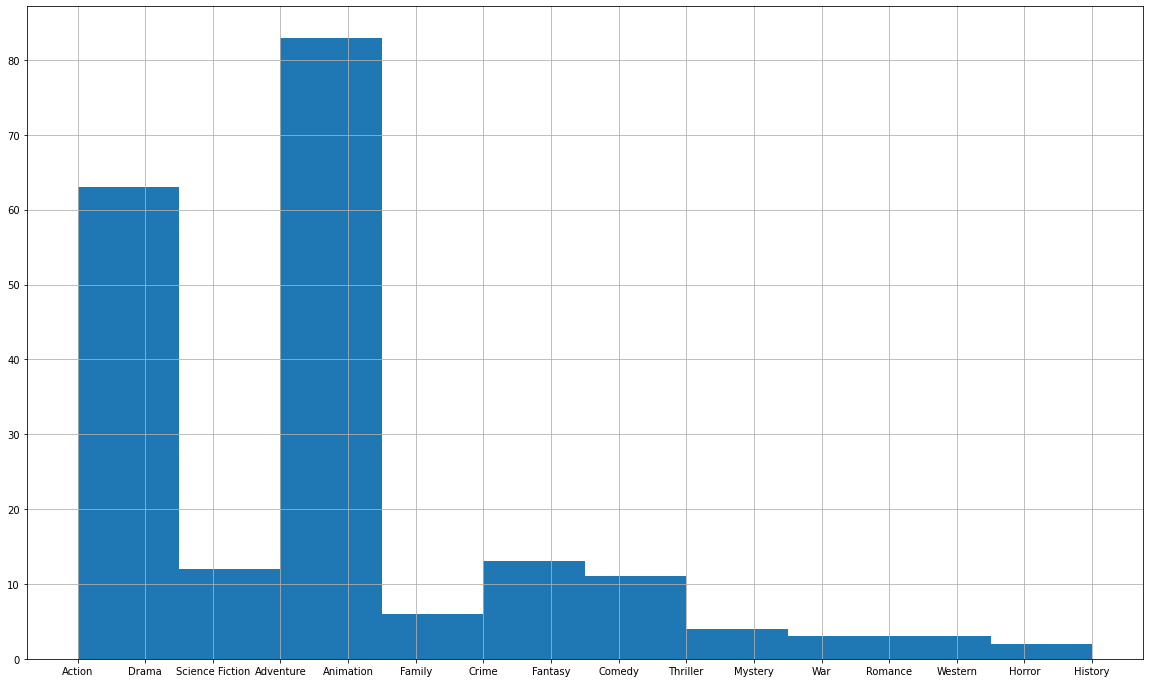

In [102]:
sorted_revenue_biggest.genres.hist(figsize=(20,12))


we see that the most revenuable movies has popularity between 0 and 5, runtime is between 100-130 min for most of them, and the action and animations are the most populare movies.



### Are short movies more popular?

In [103]:
short_movies = df.sort_values(by=['runtime'], ascending = False).head(200)
runtime = short_movies['runtime']
popularity = short_movies['popularity']


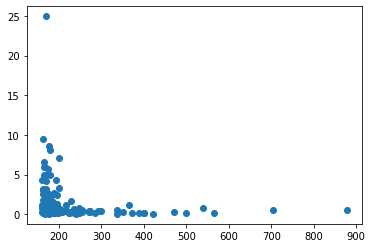

In [104]:
plt.scatter(runtime, popularity)
plt.show()


as we see the more popular movies is the shortest movies.

### Research Question 2  (Which genres are most popular from year to year?)

In [105]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
genres_popularity = df.groupby(['genres'])['popularity'].mean()
genres_popularity

genres
Action             0.875737
Adventure          1.275178
Animation          0.871280
Comedy             0.572296
Crime              0.719409
Documentary        0.209573
Drama              0.587012
Family             0.783861
Fantasy            0.907793
Foreign            0.232168
History            0.839363
Horror             0.487790
Music              0.528743
Mystery            0.621116
Romance            0.786560
Science Fiction    1.156476
TV Movie           0.268062
Thriller           0.691054
War                0.789277
Western            0.690646
Name: popularity, dtype: float64

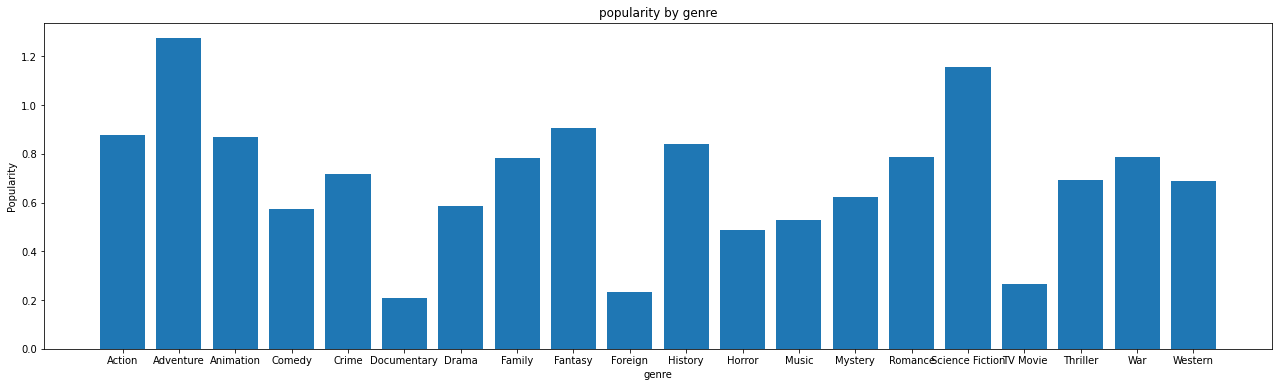

In [106]:
plt.subplots(figsize=(22, 6))
plt.bar(genres_popularity.index, genres_popularity)
plt.title('popularity by genre')
plt.xlabel('genre')
plt.ylabel('Popularity');

as we see that Adventure movies is the most popular genre then the science fiction movies is the second one (Marvel and DC war ::""D).

<a id='conclusions'></a>
## Conclusions

> it was a good game haha..now we are going to do a small Summary to get a decisions for our future industry.
> from first question : we get that the most revenuable movies has popularity between 0 and 5, runtime is between 100-130 min for most of them, and the action and animations are the most populare movies. the more popular movies is the shortest movies.

>from second question we get that Adventure then science fiction movies are the most popular

>> so in future when we are making movies we should invest in adventure and science fiction movies with as short time as we can


In [107]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1